### Motivação:

Um importante indicador para as empresas é sua participação de mercado (Market Share).
Um dos dados que é importante é nessa analise são as importações de produtos.
Até o ano de 2021 o governo disponibilizada uma plataforma onde era possivel realizar busca dessa informações por descrição podendo ser extraido os dados de valores e quantidades.
Em 2022 o governo modificou as informações disponibilizadas https://www.gov.br/produtividade-e-comercio-exterior/pt-br/assuntos/comercio-exterior/estatisticas/base-de-dados-bruta Nessa nova versão as principais modificações são consolidação dos valores de impotação por mês além de não possui mais as impostações.


### Objetivo:

Com base nos dados registrados até o ano de 2021 o objetivo é verificar a possibilidade de realizar uma modelagem de regressão para verificar se é possivel identificar os valores de importação da concorrencia nos numeros consolidados mensal pelo governo.

### Preparação dos dados

Primeiro - avaliar os dados da nova base do governo.

##### IMPORTAÇÃO DAS BIBLIOTECAS

Importação das bibliotecas para a analise dos dados provenientes da pagina do governo que é fornecida em um documento em formato CSV.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

O arquivo do governo baixado na pagina acima é o IMP_COMPLETA.csv

In [2]:
dados_governo = pd.read_csv('dados/IMP_COMPLETA.csv', sep=';')

In [3]:
dados_governo.head(10)

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
0,1997,9,29251990,10,87,SP,1,817800,200,200,4888,180,24
1,1997,8,85049010,10,399,SP,4,817600,4891,84,30116,409,93
2,1997,8,54023300,10,63,SP,7,1010900,143834,143834,402427,10121,266
3,1997,3,38121000,10,249,SP,1,817800,9434,9172,61190,3011,163
4,1997,10,73209000,10,399,SP,4,817600,222510,49,3638,456,18
5,1997,4,40132000,11,161,SC,4,817600,450,66,288,397,0
6,1997,4,96081000,11,386,ES,4,817600,83200,1312,9199,4599,69
7,1997,7,84718014,11,249,AM,4,227600,82,258,5175,318,0
8,1997,3,84836019,11,149,MG,4,817600,2,9,2270,102,6
9,1997,3,73182200,10,249,PR,1,817800,8,8,102,4,0


Identificação dos atributos:

Identificação dos atributos que estão no arquivo do governo.<br>
CO_ANO= ano <br>
CO_MES= mês <br>
CO_NCM= código NCM, - Nomeclatura Comum do Mercosul <br>
CO_UNID= código da unidade estatística <br>
CO_PAIS= código de país de destino/origem do produto<br>
SG_UF_NCM= código da UF de origem/destino do produto <br>
CO_VIA= código da via de transporte (Aéreo = 4, maritimo = 1 etc) <br>
CO_URF= código da URF de embarque/desembarque <br> 
QT_ESTAT= quantidade estatística <br> 
KG_LIQUIDO= quilograma líquido <br>
VL_FOB= valor dólar FOB (US)<br>
VL_FRETE= valor dólar Frete (US) <br>
VL_SEGURO = valor dólar Seguro (US)

CO_UNID	    NO_UNID	                            SG_UNID
10	        QUILOGRAMA LIQUIDO	                KGL  
11	        NUMERO (UNIDADE)	                UNID.
12	        MILHEIRO	                        MIL  
13	        PARES	                            PARES
14	        METRO	                            M    
15	        METRO QUADRADO	                    M2   
16	        METRO CUBICO	                    M3   
17	        LITRO	                            LITRO
18	        MIL QUILOWATT HORA	                MKW/H
19	        QUILATE	                            QUILT
20	        DUZIA	                            DUZIA
21	        TONELADA METRICA LIQUIDA	        TML  
22	        GRAMA LIQUIDO	                    GRAMA
23	        BILHOES DE UNIDADES INTERNACIONAIS	BUI  
24	        QUILOGRAMA BRUTO	                KGBR 


CO_PAIS	    CO_PAIS_ISON3	    CO_PAIS_ISOA3	    NO_PAIS
0	        898	                ZZZ	                Não Definido
23	        276	                DEU	                Alemanha
263	        32	                ARG	                Argentina
105	        76	                BRA	                Brasil
1160	    156	                CHN	                China
169	        170	                COL	                Colômbia
245	        724	                ESP	                Espanha          
249	        840	                USA	                Estados Unidos
275	        250	                FRA	                França             
367	        826	                GBR	                Inglaterra
607	        620	                PRT	                Portugal
676	643	RUS	Rússia
764	752	SWE	Suécia

CO_VIA	    NO_VIA
0	        VIA NAO DECLARADA
1	        MARITIMA
2	        FLUVIAL
3	        LACUSTRE
4	        AEREA
5	        POSTAL
6	        FERROVIARIA
7	        RODOVIARIA
8	        CONDUTO/REDE DE TRANSMISSAO
9	        MEIOS PROPRIOS
10	        ENTRADA/SAIDA FICTA
11	        COURIER
15	        VICINAL FRONTEIRICO
14	        DUTOS
12	        EM MAOS
13	        POR REBOQUE
99	        VIA DESCONHECIDA

Quais são os anos que possuem dados?

In [4]:
dados_governo['CO_ANO'].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022], dtype=int64)

### Filtros

Realizando uma primeiros filtros dos dados <br>
Conhecimento da area de negocio da empresa:<br>
As importações que estamos analisando possuem algumas caracteristicas:<br>
Todas importações do material que queremos analisar vem todos dos EUA e possui o NCM= 84564000

Na mesma pagina do governo onde os dados foram baixados há um dicionario de dados: <br> 
Codigos: <br> 
Estados Unidos = 249

In [5]:
estados_unidos = 249

Filtrando os dados que contenham: <br> NCM = 84564000 e que tenham origem Estados Unidos

In [6]:
df_gov = dados_governo[(dados_governo['CO_NCM']==84564000)&
                        (dados_governo['CO_PAIS']==estados_unidos)]

Outro conhecimento da area de negocio é que o principal competidor está localizado em São Paulo. <br> 
Filtro para selecionar apenas os dados que contenham o estado de São Paulo.

In [7]:
df_gov = df_gov[df_gov['SG_UF_NCM']=='SP']

In [8]:
df_gov[df_gov["CO_VIA"]==4]

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
26849588,2017,8,84564000,11,249,SP,4,817600,23,1021,45902,3319,0
26947803,2017,7,84564000,11,249,SP,4,817600,38,1984,81930,6580,0
26975216,2017,6,84564000,11,249,SP,4,817600,174,1519,59308,4605,0
27457388,2017,12,84564000,11,249,SP,4,817600,30,1408,56154,4462,0
27649071,2017,11,84564000,11,249,SP,4,817600,22,1444,54103,4612,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36400226,2022,1,84564000,11,249,SP,4,817600,51,2065,84605,8653,0
36529649,2022,4,84564000,11,249,SP,4,817600,59,3330,115905,15741,0
36905404,2022,3,84564000,11,249,SP,4,817600,72,5924,173435,25819,0
36961288,2022,2,84564000,11,249,SP,4,817600,39,8813,199246,36303,0


Limpeza:

In [9]:
colunas_limpeza = [ 'CO_VIA',
                   'CO_URF', 
                   'CO_NCM',
                   'CO_PAIS']

In [10]:
df_gov = df_gov.drop(columns = colunas_limpeza)

Adicionar uma coluna do tipo DateTime

 Adicionando uma coluna day com valores iguais a 1 <br> Alterando os nomes das colunas 'CO_ANO':'year', 'CO_MES':'month' <br> Criar a coluna DATA do tipo datetime.

In [11]:
df_gov['day']=1

In [12]:
df_gov.rename(columns= {'CO_ANO':'year', 'CO_MES':'month'}, inplace = True)
df_gov['DATA']= pd.to_datetime(df_gov[['year', 'month','day']]) # cria uma coluna tipo datetime
df_gov.drop(columns=['year', 'month', 'day'], inplace = True) # elimina a coluna Ano e Mes do data Frame

In [13]:
df_gov.head()

,CO_UNID,SG_UF_NCM,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO,DATA
26849588,11,SP,23,1021,45902,3319,0,2017-08-01
26947803,11,SP,38,1984,81930,6580,0,2017-07-01
26975216,11,SP,174,1519,59308,4605,0,2017-06-01
27457388,11,SP,30,1408,56154,4462,0,2017-12-01
27649071,11,SP,22,1444,54103,4612,0,2017-11-01


In [14]:
df_gov['VL_SEGURO'].unique()

array([ 0, 13, 20], dtype=int64)

O valor unico do CO_UNID temos apenas o valor 11 que representa que o atributo QT_ESTAT é Unidades.

In [15]:
df_gov.drop(columns = ['CO_UNID'], inplace = True)

Consolidação dos valores por data.

In [16]:
df_gov = df_gov.groupby(['DATA']).sum()

In [17]:
df_gov

,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
DATA,,,,,
2017-01-01,14,456,25228,1454,0
2017-02-01,10,1088,25784,3338,0
2017-03-01,62,4750,148973,14445,0
2017-04-01,37,2553,86534,7468,0
2017-05-01,25,1487,54522,4672,0
...,...,...,...,...,...
2022-01-01,51,2065,84605,8653,0
2022-02-01,39,8813,199246,36303,0
2022-03-01,72,5924,173435,25819,0


Leitura dos dados do Siscore

In [18]:
df_siscore = pd.read_excel('dados/market Share 2021 a 2016_Brasil_rev02.xlsx', sheet_name = 'Importações HT Fontes Cutting', 
                   usecols=['QTD_COMERCIAL', 'TOT_UN_PROD_DOLAR EM DOLAR', 'ANO', 'MÊS'] )

c:\users\carlos neri\appdata\local\programs\python\python39\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [19]:
df_siscore.head()

,QTD_COMERCIAL,TOT_UN_PROD_DOLAR EM DOLAR,ANO,MÊS
0,1,15313.06,2021,1
1,1,15313.06,2021,6
2,1,6284.17,2021,7
3,1,6284.17,2021,1
4,1,6284.17,2021,1


Adicionar uma coluna Datetime

 Adicionando uma coluna day com valores iguais a 1 <br> Alterando os nomes das colunas 'CO_ANO':'year', 'CO_MES':'month' <br> Criar a coluna DATA do tipo datetime.

In [20]:
df_siscore['day'] = 1
df_siscore.rename(columns = {'ANO':'year', 'MÊS':'month'}, inplace = True)
df_siscore['CO_ANO_MES']= pd.to_datetime(df_siscore[['year', 'month','day']])
df_siscore.drop(columns=['year', 'month', 'day'], inplace = True)

In [21]:
df_siscore = df_siscore.groupby(['CO_ANO_MES']).sum()

In [22]:
df_siscore.head()

,QTD_COMERCIAL,TOT_UN_PROD_DOLAR EM DOLAR
CO_ANO_MES,,
2016-01-01,3,13265.16
2016-02-01,4,17473.43
2016-04-01,3,13194.01
2016-05-01,1,4350.57
2016-06-01,1,4350.57


Criação de uma tabela única com os dados do governo e do Siscore.

In [23]:
df_siscore.shape

(42, 2)

In [24]:
df_siscore.reset_index(inplace = True)

In [25]:
df_siscore.head()

,CO_ANO_MES,QTD_COMERCIAL,TOT_UN_PROD_DOLAR EM DOLAR
0,2016-01-01,3,13265.16
1,2016-02-01,4,17473.43
2,2016-04-01,3,13194.01
3,2016-05-01,1,4350.57
4,2016-06-01,1,4350.57


In [26]:
df_gov.reset_index(inplace = True)

In [31]:
df_gov.head()

,DATA,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
0,2017-01-01,14,456,25228,1454,0
1,2017-02-01,10,1088,25784,3338,0
2,2017-03-01,62,4750,148973,14445,0
3,2017-04-01,37,2553,86534,7468,0
4,2017-05-01,25,1487,54522,4672,0


In [32]:
df_gov.rename(columns = {'DATA':'CO_ANO_MES',
                         'QT_ESTAT':'GOV_QTD',
                         'KG_LIQUIDO':'GOV_PESO',
                         'VL_FOB':'GOV_FOB',
                         'VL_FRETE':'GOV_FRETE',
                         'VL_SEGURO':'GOV_SEGURO'}, inplace = True)

In [33]:
df_siscore.rename(columns = {'QTD_COMERCIAL':'SISC_QTD',
                             'TOT_UN_PROD_DOLAR EM DOLAR':'SISC_FOB'}, inplace = True)

JOIN das tabelas de imporação do governo e da importação.

In [34]:
df = pd.merge( df_gov,df_siscore, how= 'left', on ='CO_ANO_MES')

In [35]:
df.head(15)

,CO_ANO_MES,GOV_QTD,GOV_PESO,GOV_FOB,GOV_FRETE,GOV_SEGURO,SISC_QTD,SISC_FOB
0,2017-01-01,14,456,25228,1454,0,1.0,4421.72
1,2017-02-01,10,1088,25784,3338,0,NaN,NaN
2,2017-03-01,62,4750,148973,14445,0,NaN,NaN
3,2017-04-01,37,2553,86534,7468,0,NaN,NaN
4,2017-05-01,25,1487,54522,4672,0,NaN,NaN
5,2017-06-01,174,1519,59308,4605,0,2.0,12239.95
6,2017-07-01,38,1984,81930,6580,0,2.0,12239.95
7,2017-08-01,23,1021,45902,3319,0,NaN,NaN
8,2017-09-01,35,1474,66857,4807,0,NaN,NaN
9,2017-10-01,17,1011,38135,3141,0,1.0,12401.05


In [36]:
df.isnull().sum()

CO_ANO_MES     0
GOV_QTD        0
GOV_PESO       0
GOV_FOB        0
GOV_FRETE      0
GOV_SEGURO     0
SISC_QTD      31
SISC_FOB      31
dtype: int64

Adicionando valores 0 aos valores nulos já que representa que naquela data não tivemos importação de fontes registradas no Siscore.

In [37]:
df.fillna(0, inplace= True)

In [38]:
df

,CO_ANO_MES,GOV_QTD,GOV_PESO,GOV_FOB,GOV_FRETE,GOV_SEGURO,SISC_QTD,SISC_FOB
0,2017-01-01,14,456,25228,1454,0,1.0,4421.72
1,2017-02-01,10,1088,25784,3338,0,0.0,0.00
2,2017-03-01,62,4750,148973,14445,0,0.0,0.00
3,2017-04-01,37,2553,86534,7468,0,0.0,0.00
4,2017-05-01,25,1487,54522,4672,0,0.0,0.00
...,...,...,...,...,...,...,...,...
60,2022-01-01,51,2065,84605,8653,0,0.0,0.00
61,2022-02-01,39,8813,199246,36303,0,0.0,0.00
62,2022-03-01,72,5924,173435,25819,0,0.0,0.00
63,2022-04-01,59,3330,115905,15741,0,0.0,0.00


Guardar em um arquivo CSV a nova tabela com os dados tratados.

In [39]:
df.to_csv("dados/final_seguro_frete.csv", index=False)

Testando as hipoteses...

1- É possivel estabelecer uma regressão linear entre o valor SISC_FOB e outros dados GOV?

<AxesSubplot:xlabel='GOV_FOB', ylabel='SISC_FOB'>

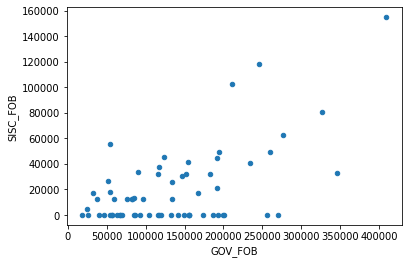

In [40]:
df.plot.scatter(x = 'GOV_FOB', y = 'SISC_FOB')

<AxesSubplot:xlabel='GOV_PESO', ylabel='SISC_FOB'>

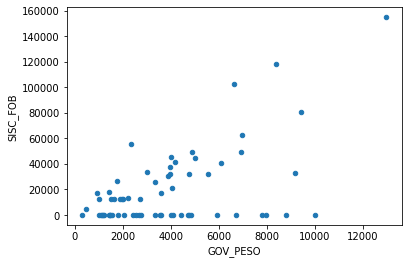

In [41]:
df.plot.scatter(x = 'GOV_PESO', y = 'SISC_FOB')

<AxesSubplot:xlabel='GOV_FRETE', ylabel='SISC_FOB'>

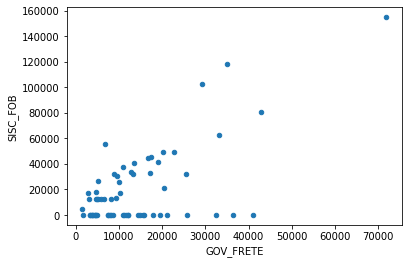

In [46]:
df.plot.scatter(x = 'GOV_FRETE', y = 'SISC_FOB')

É possvel obeservar que nos graficos de dispesão há varios valores onde não tivemos importação da concorrencia.

Como se comporta o grafico apenas com os dados onde temos valores de importação SISC

In [43]:

df_importacao = df[df['SISC_QTD']>0] 
df_importacao.shape

(34, 8)

In [44]:
df_importacao.head()

,CO_ANO_MES,GOV_QTD,GOV_PESO,GOV_FOB,GOV_FRETE,GOV_SEGURO,SISC_QTD,SISC_FOB
0,2017-01-01,14,456,25228,1454,0,1.0,4421.72
5,2017-06-01,174,1519,59308,4605,0,2.0,12239.95
6,2017-07-01,38,1984,81930,6580,0,2.0,12239.95
9,2017-10-01,17,1011,38135,3141,0,1.0,12401.05
10,2017-11-01,22,1444,54103,4612,0,2.0,18290.52


<AxesSubplot:xlabel='GOV_FOB', ylabel='SISC_FOB'>

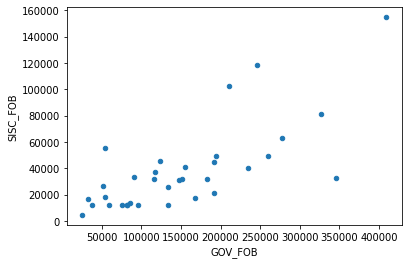

In [52]:
df_importacao.plot.scatter(x = 'GOV_FOB', y = 'SISC_FOB')

<AxesSubplot:xlabel='GOV_PESO', ylabel='SISC_FOB'>

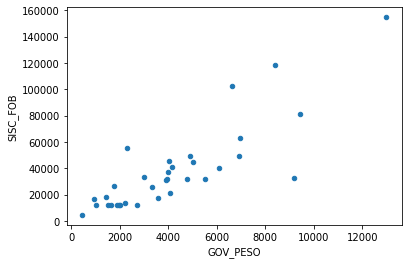

In [47]:
df_importacao.plot.scatter(x = 'GOV_PESO', y = 'SISC_FOB')

<AxesSubplot:xlabel='GOV_FRETE', ylabel='SISC_FOB'>

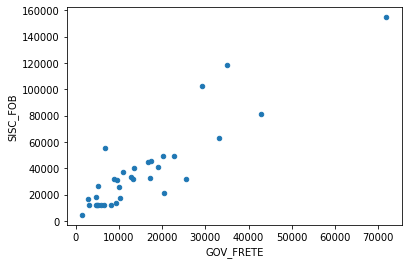

In [49]:
df_importacao.plot.scatter(x = 'GOV_FRETE', y = 'SISC_FOB')

Aparentemente há uma correlação positiva entre os valores.
Relizar um teste estatistico para avaliar

### Analise estatistica

In [120]:

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
from scipy.stats import t
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

In [56]:
model = smf.ols('SISC_FOB ~ GOV_FOB + GOV_PESO + GOV_QTD + GOV_FRETE + GOV_SEGURO', data = df_importacao)

resumo = model.fit()
print(resumo.summary())

                            OLS Regression Results                            
Dep. Variable:               SISC_FOB   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     67.68
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           2.77e-14
Time:                        14:40:11   Log-Likelihood:                -361.66
No. Observations:                  34   AIC:                             733.3
Df Residuals:                      29   BIC:                             741.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9299.8567   3865.269      2.406      0.0

c:\users\carlos neri\appdata\local\programs\python\python39\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


Removendo o atributo GOV_SEGURO já que não traz nenhuma informação.

In [58]:
model = smf.ols('SISC_FOB ~ GOV_FOB + GOV_PESO + GOV_QTD + GOV_FRETE', data = df_importacao)

resumo = model.fit()
print(resumo.summary())

                            OLS Regression Results                            
Dep. Variable:               SISC_FOB   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     67.68
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           2.77e-14
Time:                        14:42:17   Log-Likelihood:                -361.66
No. Observations:                  34   AIC:                             733.3
Df Residuals:                      29   BIC:                             741.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9299.8567   3865.269      2.406      0.0

Teste de utilidade do modelo: <br>

Hipótese nula 𝐇𝟎: 𝛃𝟏= 𝛃𝟐 = 𝛃𝟑=𝟎
<br>
Hipótese alternativa 𝐇1 pelo menos um 𝛃𝐢 ≠ 𝟎

f = [(R^2)/K]/[(1-R^2)/(n-(k+1))]

F-statistic:67.68
fcrit = 2,7 <br>
Como f > fcrit indica que pelo menos um dos parametros é difernete de zero. 

Teste individual dos parametros 𝛃𝟏, 𝛃𝟐 e 𝛃𝟑 <br>
Teste de hipotese: <br>
H0: 𝛃i = 0 <br>
H1: 𝛃i ≠ 0  (| t |>= tcrit ) <br>
𝒕𝒄rit =𝐭𝛂/𝟐,(𝐧−(𝐤+𝟏)) <br>
dados: <br>
n = 34 <br>
k = 3 <br>
𝛂 = 95%

In [63]:
ic = 95 # incide de confiança
n = 34
k = 4
alpha = (100 - ic)/100
gl = n-(k+1)

Determinação do t critico

In [64]:
tcrit = t.ppf(1-alpha/2, gl)
tcrit

2.045229642132703

Testes de GOV_FOB

In [73]:
t_gov_fob = -0.4066/0.106
t_gov_fob

-0.1068032571578671

Como | t | > |tcrit| rejeita H0; GOV_FOB deve ser mantido

Teste de GOV_PESO 

In [74]:
t_gov_peso = 17.7075/3.807
t_gov_peso

4.65130023640662

Como | t | > |tcrit| rejeita H0; GOV_PESO deve ser mantido

Teste de GOV_QTD

In [75]:
t_gov_qtd = -64.5034 /76.442
t_gov_qtd

-0.8438214594071323

Como | t | < |tcrit| NÃO rejeita H0; GOV_QTD deve ser retirado

In [76]:
t_gov_frete = 1.3251/0.322
t_gov_frete

4.1152173913043475

Como | t | > |tcrit| rejeita H0; GOV_FRETE deve ser mantido

Retirando a variavel GOV_PESO da analise

In [180]:
model = smf.ols('SISC_FOB ~ GOV_FOB + GOV_PESO +GOV_FRETE ', data = df_importacao)
resumo = model.fit()
print(resumo.summary())

                            OLS Regression Results                            
Dep. Variable:               SISC_FOB   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     90.87
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           3.74e-15
Time:                        17:43:29   Log-Likelihood:                -362.07
No. Observations:                  34   AIC:                             732.1
Df Residuals:                      30   BIC:                             738.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8253.9225   3643.521      2.265      0.0

Conclusão até o momento é que há um relação entre o valor SISC_FOB e o parametros GOV_FOB e GOV_PESO. <br>
Foi observado que a relação funciona levando em consideração os dados onde sabems que houve importação de fontes. <br>
iremos trabalhar em uma maneira de classificar quando tivemos importação ou não.

Testes de hipoteses com as 3 variaveis

In [78]:
ic = 95 # incide de confiança
n = 34
k = 3
alpha = (100 - ic)/100
gl = n-(k+1)

In [79]:
tcrit = t.ppf(1-alpha/2, gl)
tcrit

2.0422724563012373

Valores de t do statsmodels
      
GOV_FOB:  -5.163      
GOV_PESO:  5.158      
GOV_FRETE: 4.140 <br>
Vemos que todos os | t | > que o tcrit. <br>
Portanto mantemos os parametros. 

Criando um dataframe apenas com as variaveis do modelo StatsModel.

In [82]:
df_importacao.columns

Index(['CO_ANO_MES', 'GOV_QTD', 'GOV_PESO', 'GOV_FOB', 'GOV_FRETE',
       'GOV_SEGURO', 'SISC_QTD', 'SISC_FOB'],
      dtype='object')

In [83]:
df_statsmodel = df_importacao.drop(columns= ['GOV_QTD', 'GOV_SEGURO', 'SISC_QTD'])

In [84]:
df_statsmodel

,CO_ANO_MES,GOV_PESO,GOV_FOB,GOV_FRETE,SISC_FOB
0,2017-01-01,456,25228,1454,4421.72
5,2017-06-01,1519,59308,4605,12239.95
6,2017-07-01,1984,81930,6580,12239.95
9,2017-10-01,1011,38135,3141,12401.05
10,2017-11-01,1444,54103,4612,18290.52
12,2018-01-01,2325,54167,6784,55434.41
13,2018-02-01,947,32180,2906,16903.66
16,2018-05-01,3601,167607,10268,17484.08
20,2018-09-01,1758,51308,5155,26781.09
21,2018-10-01,6925,259753,20204,49443.10


Verificação de multicolinearidade.

In [112]:
corr = df_statsmodel.corr()
print(corr)

           GOV_PESO   GOV_FOB  GOV_FRETE  SISC_FOB
GOV_PESO   1.000000  0.972244   0.901094  0.838640
GOV_FOB    0.972244  1.000000   0.848584  0.727535
GOV_FRETE  0.901094  0.848584   1.000000  0.899147
SISC_FOB   0.838640  0.727535   0.899147  1.000000


Valor de R^2 ajustado do modelo <br>
r^2 = 0,891

In [111]:
mc2 = corr**2
print(mc2)

           GOV_PESO   GOV_FOB  GOV_FRETE  SISC_FOB
GOV_PESO   1.000000  0.945257   0.811971  0.703317
GOV_FOB    0.945257  1.000000   0.720096  0.529307
GOV_FRETE  0.811971  0.720096   1.000000  0.808465
SISC_FOB   0.703317  0.529307   0.808465  1.000000


In [151]:
vif = np.linalg.inv(mc2)
print(vif)

[[ 20.51843799 -15.93788613  -0.97258069  -5.20863552]
 [-15.93788613  14.49230421  -1.02631536   4.36824892]
 [ -0.97258069  -1.02631536   4.43596972  -2.35905847]
 [ -5.20863552   4.36824892  -2.35905847   4.25839452]]


Vemos a prsença de multicolinearidade entre as variaveis GOV_FOB e GOV_PESO.

Vamos restirar a variavel GOV_PESO e refazer a analise.

In [193]:
model = smf.ols('SISC_FOB ~ GOV_FRETE + GOV_FOB ', data = df_importacao)
resumo1 = model.fit()
print(resumo1.summary())

                            OLS Regression Results                            
Dep. Variable:               SISC_FOB   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     67.37
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           5.19e-12
Time:                        17:54:30   Log-Likelihood:                -372.87
No. Observations:                  34   AIC:                             751.7
Df Residuals:                      31   BIC:                             756.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8684.9709   4921.970      1.765      0.0

In [194]:
ic = 95 # incide de confiança
n = 34
k = 2
alpha = (100 - ic)/100
gl = n-(k+1)

In [195]:
tcrit = t.ppf(1-alpha/2, gl)
tcrit

2.0395134463964077

Retirando o valor de GOV_FOB

In [225]:
model = smf.ols('SISC_FOB ~ GOV_FRETE', data = df_importacao)
resumo2 = model.fit()
print(resumo2.summary())

                            OLS Regression Results                            
Dep. Variable:               SISC_FOB   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     135.1
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           5.07e-13
Time:                        18:07:57   Log-Likelihood:                -373.27
No. Observations:                  34   AIC:                             750.5
Df Residuals:                      32   BIC:                             753.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5953.2448   3754.171      1.586      0.1

Analise do modelo

In [209]:
#valor previsto 
y_pred = list(resumo2.predict())

In [210]:
#valor do residuo
residuo = list(resumo2.resid)

In [211]:
influence = resumo2.get_influence()

In [212]:
#obter residuos estandarizados
stdresid = list(influence.resid_studentized_internal)

In [213]:
prop = np.divide(residuo,stdresid)  

In [214]:
y = list(df_statsmodel['SISC_FOB'])

In [215]:
dftab = pd.DataFrame(list(zip(y, y_pred, residuo, stdresid, prop)),columns = ["y", "y_p", "e", "e*", "e/e*"])
dftab.head(10)

,y,y_p,e,e*,e/e*
0,4421.72,8991.050829,-4569.330829,-0.322338,14175.609644
1,12239.95,15574.356774,-3334.406774,-0.233744,14265.236429
2,12239.95,19700.675162,-7460.725162,-0.521375,14309.700024
3,12401.05,12515.657979,-114.607979,-0.008056,14226.470202
4,18290.52,15588.981700,2701.538300,0.189377,14265.409871
5,55434.41,20126.887289,35307.522711,2.466680,14313.783059
6,16903.66,12024.678323,4878.981677,0.343112,14219.783949
7,17484.08,27405.921853,-9921.841853,-0.690508,14368.894049
8,26781.09,16723.458097,10057.631903,0.704389,14278.519570
9,49443.10,48164.959576,1278.140424,0.088909,14375.814633


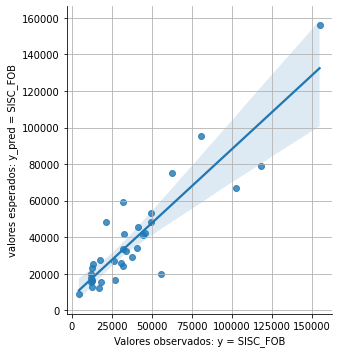

In [216]:
sns.lmplot(x = 'y', y = 'y_p', data=dftab); plt.grid(True)
plt.xlabel('Valores observados: y = SISC_FOB')
plt.ylabel('valores esperados: y_pred = SISC_FOB')

plt.show()

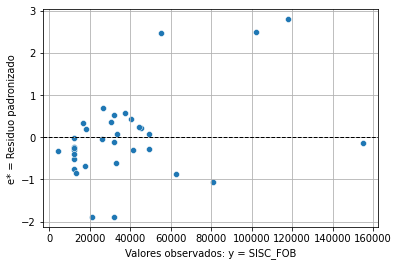

In [217]:
sns.scatterplot(x = 'y', y = 'e*', data=dftab); plt.grid(True)
plt.xlabel('Valores observados: y = SISC_FOB')
plt.ylabel('e* = Residuo padronizado')
plt.axhline(y=0, color='black', linestyle ='--', linewidth=1)
plt.show()

c:\users\carlos neri\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


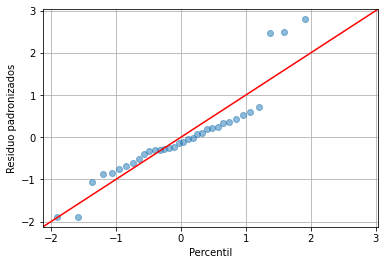

In [218]:
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha =0.5, color = 'red', lw = 1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Residuo padronizados')
plt.grid(True)

O modelo apresenta condições de uso.

O modelo foi testado onde sabemos que possuimos importações, ou seja, foram desconsiderados os dados onde o valor do SISB_FOB = 0 que representa não haver importação das fontes. <br>
O valor de GOV_FRETE foi visto como o que apresenta maior relevancia de todas os dados. 
Nesse caso antes de aplicar o modelo tenho que pasasr os dados por uma classificação binária em teve ou não importação.


### Modelo para classificação

Primeiro separar os dados de 2022 que não temos informação e estes serão os dados que iremos avaliar

In [248]:
df_2022 = df[df['CO_ANO_MES'].dt.year==2022]

Criar um DF com os dados antes de 2022

In [273]:
df_teste = df[df['CO_ANO_MES'].dt.year<2022]

In [280]:
df_teste.head(10)

,CO_ANO_MES,GOV_QTD,GOV_PESO,GOV_FOB,GOV_FRETE,GOV_SEGURO,SISC_QTD,SISC_FOB,IMPORTACAO
0,2017-01-01,14,456,25228,1454,0,1.0,4421.72,1
1,2017-02-01,10,1088,25784,3338,0,0.0,0.00,0
2,2017-03-01,62,4750,148973,14445,0,0.0,0.00,0
3,2017-04-01,37,2553,86534,7468,0,0.0,0.00,0
4,2017-05-01,25,1487,54522,4672,0,0.0,0.00,0
5,2017-06-01,174,1519,59308,4605,0,2.0,12239.95,1
6,2017-07-01,38,1984,81930,6580,0,2.0,12239.95,1
7,2017-08-01,23,1021,45902,3319,0,0.0,0.00,0
8,2017-09-01,35,1474,66857,4807,0,0.0,0.00,0
9,2017-10-01,17,1011,38135,3141,0,1.0,12401.05,1


In [281]:
filtro = df_teste['SISC_QTD'] > 0
filtro.head(10)

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7    False
8    False
9     True
Name: SISC_QTD, dtype: bool

In [284]:
df_teste['IMPORTACAO'] = 0
df_teste.head(10)

<ipython-input-284-13651a22259d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['IMPORTACAO'] = 0


,CO_ANO_MES,GOV_QTD,GOV_PESO,GOV_FOB,GOV_FRETE,GOV_SEGURO,SISC_QTD,SISC_FOB,IMPORTACAO
0,2017-01-01,14,456,25228,1454,0,1.0,4421.72,0
1,2017-02-01,10,1088,25784,3338,0,0.0,0.00,0
2,2017-03-01,62,4750,148973,14445,0,0.0,0.00,0
3,2017-04-01,37,2553,86534,7468,0,0.0,0.00,0
4,2017-05-01,25,1487,54522,4672,0,0.0,0.00,0
5,2017-06-01,174,1519,59308,4605,0,2.0,12239.95,0
6,2017-07-01,38,1984,81930,6580,0,2.0,12239.95,0
7,2017-08-01,23,1021,45902,3319,0,0.0,0.00,0
8,2017-09-01,35,1474,66857,4807,0,0.0,0.00,0
9,2017-10-01,17,1011,38135,3141,0,1.0,12401.05,0


In [285]:
df_teste.loc[filtro, 'IMPORTACAO'] = 1

c:\users\carlos neri\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [286]:
df_teste.head(10)

,CO_ANO_MES,GOV_QTD,GOV_PESO,GOV_FOB,GOV_FRETE,GOV_SEGURO,SISC_QTD,SISC_FOB,IMPORTACAO
0,2017-01-01,14,456,25228,1454,0,1.0,4421.72,1
1,2017-02-01,10,1088,25784,3338,0,0.0,0.00,0
2,2017-03-01,62,4750,148973,14445,0,0.0,0.00,0
3,2017-04-01,37,2553,86534,7468,0,0.0,0.00,0
4,2017-05-01,25,1487,54522,4672,0,0.0,0.00,0
5,2017-06-01,174,1519,59308,4605,0,2.0,12239.95,1
6,2017-07-01,38,1984,81930,6580,0,2.0,12239.95,1
7,2017-08-01,23,1021,45902,3319,0,0.0,0.00,0
8,2017-09-01,35,1474,66857,4807,0,0.0,0.00,0
9,2017-10-01,17,1011,38135,3141,0,1.0,12401.05,1


In [288]:
limpeza = ['CO_ANO_MES','GOV_SEGURO','SISC_QTD','SISC_FOB',]

In [ ]:
df_teste.drop(columns=limpeza, inplace = True)

In [ ]:
df_2022.drop(columns=limpeza, inplace = True)

In [292]:
df_teste.head()

,GOV_QTD,GOV_PESO,GOV_FOB,GOV_FRETE,IMPORTACAO
0,14,456,25228,1454,1
1,10,1088,25784,3338,0
2,62,4750,148973,14445,0
3,37,2553,86534,7468,0
4,25,1487,54522,4672,0


In [293]:
df_2022.head()

,GOV_QTD,GOV_PESO,GOV_FOB,GOV_FRETE
60,51,2065,84605,8653
61,39,8813,199246,36303
62,72,5924,173435,25819
63,59,3330,115905,15741
64,106,7965,269738,17895


In [412]:
len(df_teste[df_teste['IMPORTACAO']==0])

26

#### Importação das bibliotecas 

In [294]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score # Validação cruzada
from sklearn.model_selection import StratifiedKFold # 

#### Arvore de decisão

In [397]:
clf_arvore = tree.DecisionTreeClassifier(max_depth=3, )

In [398]:
y  = df_teste['IMPORTACAO']

In [399]:
X = df_teste.drop(columns = ['IMPORTACAO'])

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.5)

In [401]:
clf_arvore = clf_arvore.fit(X_train, y_train)

In [402]:
y_res_arvore_decisao = clf.predict(X_test)

In [403]:
accuracy_score(y_test, y_res_arvore_decisao)

0.7

In [404]:
y_res_arvore_decisao

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
y_test.tolist()

In [ ]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)
scores = cross_val_score(clf, X, y, cv=5)

In [ ]:
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
intervalo(results)

Analise com Knn

In [ ]:
instervalo(scores)

In [378]:
from sklearn.neighbors import NearestCentroid

In [379]:
clf_knn = NearestCentroid()

In [380]:
clf_knn.fit(X_train, y_train)

NearestCentroid()

In [381]:
y_res_knn= clf_knn.predict(X_test)

In [382]:
accuracy_score(y_test, y_res_knn)

0.5833333333333334